In [2]:
#importing Libraries

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot

In [3]:
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
#Extracting Data

In [5]:
d = pd.read_csv('file_cricket.csv')

In [6]:
#Exploring Data

In [7]:
d.head()

,Unnamed: 0,Index,Date,Series,Ground,result
0,0,1,13/07/1974,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets
1,1,2,15/07/1974,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets
2,2,3,07/06/1975,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs
3,3,4,11/06/1975,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets
4,4,5,14/06/1975,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  993 non-null    int64 
 1   Index       993 non-null    int64 
 2   Date        993 non-null    object
 3   Series      993 non-null    object
 4   Ground      993 non-null    object
 5   result      993 non-null    object
dtypes: int64(2), object(4)
memory usage: 46.7+ KB


In [11]:
#preparing Data

In [12]:
d['Date'] = d['Date'].apply(pd.to_datetime)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '13/07/1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '15/07/1974' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '14/06/1975' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '21/02/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '22/02/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for c

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '30/01/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '15/03/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '17/03/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '19/03/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '22/03/2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for c

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '15/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '19/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '23/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '27/01/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\apply.py:1137: UserWarning:

Parsing '15/06/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for c

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  993 non-null    int64         
 1   Index       993 non-null    int64         
 2   Date        993 non-null    datetime64[ns]
 3   Series      993 non-null    object        
 4   Ground      993 non-null    object        
 5   result      993 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 46.7+ KB


In [15]:
d['month'] = d['Date'].apply(lambda m: m.month)
d['year'] = d['Date'].apply(lambda y: y.year)

In [16]:
d.head()

,Unnamed: 0,Index,Date,Series,Ground,result,month,year
0,0,1,1974-07-13,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,7,1974
1,1,2,1974-07-15,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,7,1974
2,2,3,1975-07-06,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,7,1975
3,3,4,1975-11-06,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,1975
4,4,5,1975-06-14,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,6,1975


In [19]:
d.drop(['Index','Unnamed: 0'],axis=1,inplace=True)

In [20]:
d.head()

,Date,Series,Ground,result,month,year
0,1974-07-13,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,7,1974
1,1974-07-15,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,7,1974
2,1975-07-06,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,7,1975
3,1975-11-06,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,1975
4,1975-06-14,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,6,1975


In [23]:
d['result'][0].split('won')[0]

'England '

In [24]:
d['winner'] = d['result'].apply(lambda x: x.split('won')[0])

In [26]:
d.head(10)

,Date,Series,Ground,result,month,year,winner
0,1974-07-13,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,7,1974,England
1,1974-07-15,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,7,1974,England
2,1975-07-06,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,7,1975,England
3,1975-11-06,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,1975,India
4,1975-06-14,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,6,1975,New Zealand
5,1976-02-21,1975-1976 New Zealand v. India,AMI Stadium,New Zealand won by 9 wickets,2,1976,New Zealand
6,1976-02-22,1975-1976 New Zealand v. India,Eden Park,New Zealand won by 80 runs,2,1976,New Zealand
7,1978-01-10,1978-1979 Pakistan v. India,Ayub National Stadium,India won by 4 runs,1,1978,India
8,1978-10-13,1978-1979 Pakistan v. India,Jinnah Stadium (Sialkot),Pakistan won by 8 wickets,10,1978,Pakistan
9,1978-03-11,1978-1979 Pakistan v. India,Zafar Ali (Sahiwal) Stadium,Pakistan won (conceded by india),3,1978,Pakistan


In [39]:
d['Series'][0].split('v.')[1].split(')')[0]

' England'

In [40]:
d['lose'] = d['Series'].apply(lambda x: x.split('v.')[1].split(')')[0])

In [41]:
d.head()

,Date,Series,Ground,result,month,year,winner,lose
0,1974-07-13,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,7,1974,England,England
1,1974-07-15,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,7,1974,England,England
2,1975-07-06,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,7,1975,England,England
3,1975-11-06,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,1975,India,East Africa
4,1975-06-14,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,6,1975,New Zealand,New Zealand


<AxesSubplot:>

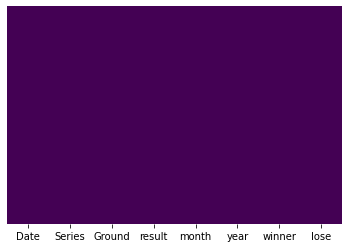

In [47]:
sns.heatmap(d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
d.isnull().sum()

Date      0
Series    0
Ground    0
result    0
month     0
year      0
winner    0
lose      0
dtype: int64

In [42]:
#Data Visualization and Data Analysis

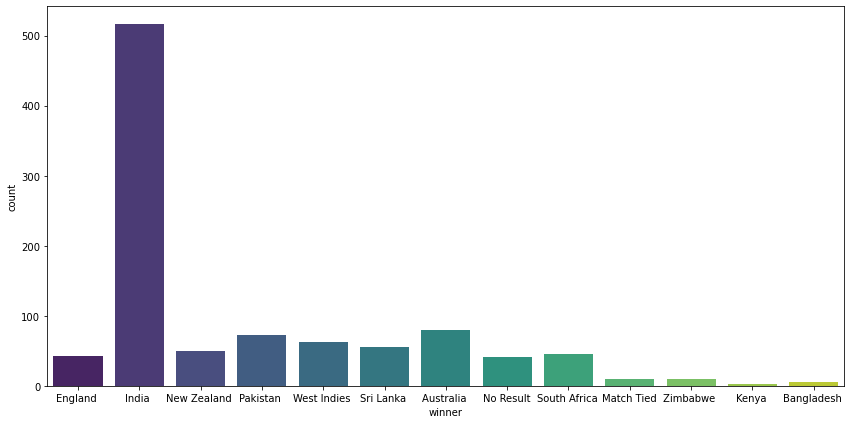

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data=d,palette='viridis')
plt.tight_layout()

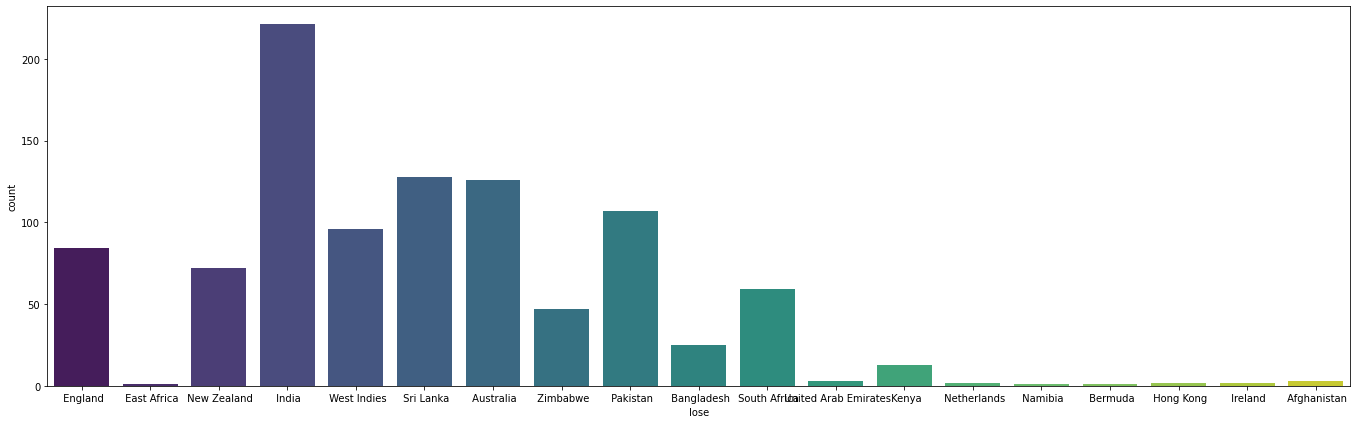

In [52]:
plt.figure(figsize=(19,6))
sns.countplot(x='lose',data=d,palette='viridis')
plt.tight_layout()

In [75]:
d['winner'].value_counts().head(5)

India           516
Australia        80
Pakistan         73
West Indies      63
Sri Lanka        56
Name: winner, dtype: int64

In [76]:
d['lose'].value_counts().head(5)

 India          221
 Sri Lanka      128
 Australia      126
 Pakistan       107
 West Indies     96
Name: lose, dtype: int64

In [88]:
d['winner'].value_counts()

India            516
Australia         80
Pakistan          73
West Indies       63
Sri Lanka         56
New Zealand       49
South Africa      46
England           43
No Result         41
Zimbabwe          10
Match Tied         9
Bangladesh         5
Kenya              2
Name: winner, dtype: int64

In [89]:
d['lose'].value_counts()

 India                   221
 Sri Lanka               128
 Australia               126
 Pakistan                107
 West Indies              96
 England                  84
 New Zealand              72
 South Africa             59
 Zimbabwe                 47
 Bangladesh               25
 Kenya                    13
 United Arab Emirates      3
 Afghanistan               3
 Netherlands               2
 Hong Kong                 2
 Ireland                   2
 East Africa               1
 Namibia                   1
 Bermuda                   1
Name: lose, dtype: int64

In [95]:
IndiaWin = 516/737*100
IndiaLose = 221/737*100
AusWin = 80/206*100
AusLose = 126/206*100
PakWin = 73/180*100
PakLose = 107/180*100
WIWin = 63/159*100
WILose = 96/159*100
SLWin = 56/184*100
SLLose = 128/184*100
NZWin = 49/121*100
NZLose = 72/121*100
SAWin = 46/105*100
SALose = 59/105*100
EngWin = 43/127*100
EngLose = 84/127*100
ZimWin = 10/57*100
ZimLose = 47/57*100
BanWin = 5/30*100
BanLose = 25/30*100

In [96]:
df = {
    'Teams':"Ind Aus Pak WI SL NZ SA ENG ZIM BAN".split(),
    'Win %':[IndiaWin,AusWin,PakWin,WIWin,SLWin,NZWin,SAWin,EngWin,ZimWin,BanWin],
    'Loss %':[IndiaLose,AusLose,PakLose,WILose,SLLose,NZLose,SALose,EngLose,ZimLose,BanLose]
}

In [97]:
df = pd.DataFrame(df)

In [100]:
df

,Teams,Win %,Loss %
0,Ind,70.013569,29.986431
1,Aus,38.834951,61.165049
2,Pak,40.555556,59.444444
3,WI,39.622642,60.377358
4,SL,30.434783,69.565217
5,NZ,40.495868,59.504132
6,SA,43.809524,56.190476
7,ENG,33.858268,66.141732
8,ZIM,17.543860,82.456140
9,BAN,16.666667,83.333333


In [123]:
df.sort_values(ascending=False,by='Win %').head(5)

,Teams,Win %,Loss %
0,Ind,70.013569,29.986431
6,SA,43.809524,56.190476
2,Pak,40.555556,59.444444
5,NZ,40.495868,59.504132
3,WI,39.622642,60.377358


In [125]:
df.sort_values(by='Loss %',ascending=False).head(5)

,Teams,Win %,Loss %
9,BAN,16.666667,83.333333
8,ZIM,17.543860,82.456140
4,SL,30.434783,69.565217
7,ENG,33.858268,66.141732
1,Aus,38.834951,61.165049


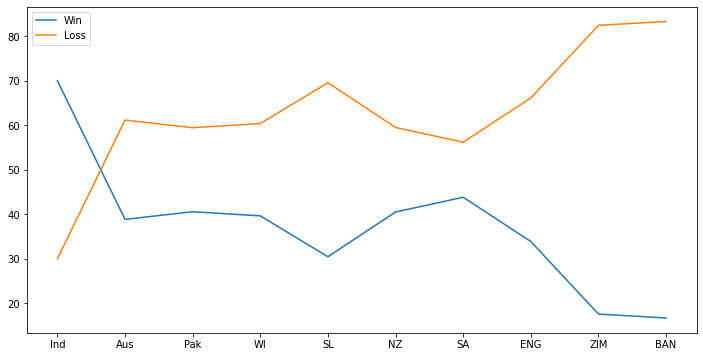

In [139]:
plt.figure(figsize=(12,6))
plt.plot(df['Teams'],df['Win %'])
plt.plot(df['Teams'],df['Loss %'])
plt.legend(['Win','Loss'])

In [142]:
d['Ground'].value_counts().head(5)

Sharjah Cricket Stadium          72
R Premadasa Stadium              43
Shere Bangla National Stadium    22
Sydney Cricket Ground            22
Melbourne Cricket Ground         22
Name: Ground, dtype: int64

In [143]:
g = ['Sharjah Cricket Stadium','R Premadasa Stadium','Shere Bangla National Stadium','Sydney Cricket Ground','Melbourne Cricket Ground']

In [144]:
v = [72,43,22,22,22]

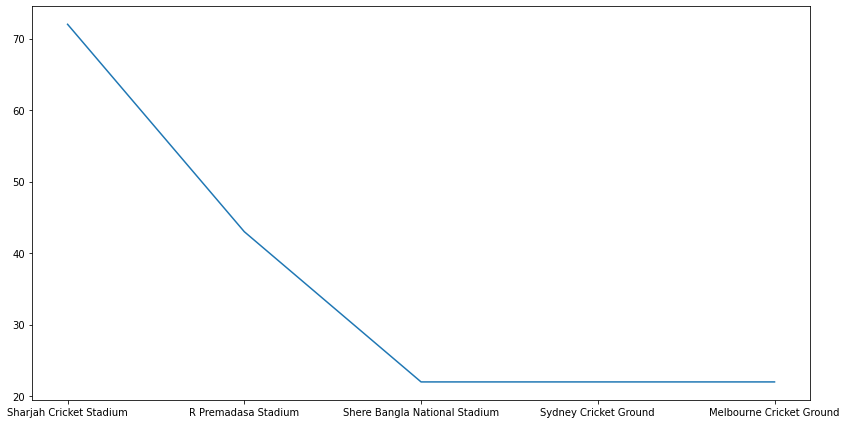

In [147]:
plt.figure(figsize=(12,6))
plt.plot(g,v)
plt.tight_layout()

In [148]:
d.head()

,Date,Series,Ground,result,month,year,winner,lose
0,1974-07-13,1974 Prudential Trophy (v. England),Headingley,England won by 4 wickets,7,1974,England,England
1,1974-07-15,1974 Prudential Trophy (v. England),Kennington Oval,England won by 6 wickets,7,1974,England,England
2,1975-07-06,1975 Prudential World Cup (v. England),Lord's,England won by 202 runs,7,1975,England,England
3,1975-11-06,1975 Prudential World Cup (v. East Africa),Headingley,India won by 10 wickets,11,1975,India,East Africa
4,1975-06-14,1975 Prudential World Cup (v. New Zealand),Old Trafford,New Zealand won by 4 wickets,6,1975,New Zealand,New Zealand


In [316]:
d['winner'].unique()

array(['England ', 'India ', 'New Zealand ', 'Pakistan ', 'West Indies ',
       'Sri Lanka ', 'Australia ', 'No Result', 'South Africa ',
       'Match Tied', 'Zimbabwe ', 'Kenya ', 'Bangladesh '], dtype=object)

In [250]:
d['lose'].unique()

array([' England', ' East Africa', ' New Zealand', ' India',
       ' West Indies', ' Sri Lanka', ' Australia', ' Zimbabwe',
       ' Pakistan', ' Bangladesh', ' South Africa',
       ' United Arab Emirates', ' Kenya', ' Netherlands', ' Namibia',
       ' Bermuda', ' Hong Kong', ' Ireland', ' Afghanistan'], dtype=object)

In [253]:
t2 = {
    ' England':1,
    ' East Africa':9,
    ' New Zealand':3,
    ' India':2,
    ' West Indies':5,
    ' Sri Lanka':6,
    ' Australia':7,
    ' Zimbabwe':11,
    ' Pakistan':4,
    ' Bangladesh':13,
    ' South Africa':9,
    ' United Arab Emirates':14,
    ' Kenya':12,
    ' Netherlands':15,
    ' Namibia':16,
    ' Bermuda':17,
    ' Hong Kong':18,
    ' Ireland':19,
    ' Afghanistan':20
}

In [252]:
t1 = {
    'England ':1,
    'India ':2,
    'New Zealand ':3,
    'Pakistan ':4,
    'West Indies ':5,    
    'Sri Lanka ':6,
    'Australia ':7,
    'No Result':8,
    'South Africa ':9,
    'Match Tied':10,
    'Zimbabwe ':11,
    'Kenya ':12,
    'Bangladesh ':13
}

In [260]:
result = d['winner']

In [261]:
r = pd.DataFrame(result)

In [262]:
r['winner'] = r['winner'].map(t1)

In [265]:
team1 = r

In [287]:
team2 = d['lose']
team2 = pd.DataFrame(team2)
df2 = pd.concat([team1,team2])
df2['team1'] = team1
df2['team2'] = team2
df2['team2'] = df2['team2'].map(t2)

In [289]:
df2.drop(['winner','lose'],axis=1,inplace=True)

In [293]:
df2['result'] = df2['team1']

In [294]:
df2.head()

,team1,team2,result
0,1,1,1
1,1,1,1
2,1,1,1
3,2,9,2
4,3,3,3


<AxesSubplot:>

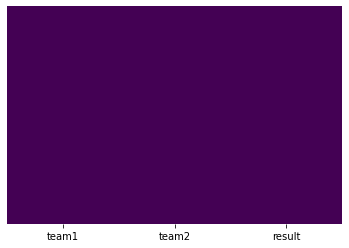

In [295]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [317]:
#Preparing Prediction Model

In [296]:
x = df2.drop('result',axis=1)
y = df2['result']

In [297]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=101)

In [298]:
knn = KNeighborsClassifier(n_neighbors=1)

In [299]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=1)

In [301]:
pred = knn.predict(xtest)

In [302]:
print(metrics.classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596



In [303]:
metrics.accuracy_score(ytest,pred)*100

100.0

In [304]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    knn_pred = knn.predict(xtest)
    error_rate.append(np.mean(ytest != knn_pred))

Text(0.5, 1.0, 'K Value vs Error rate')

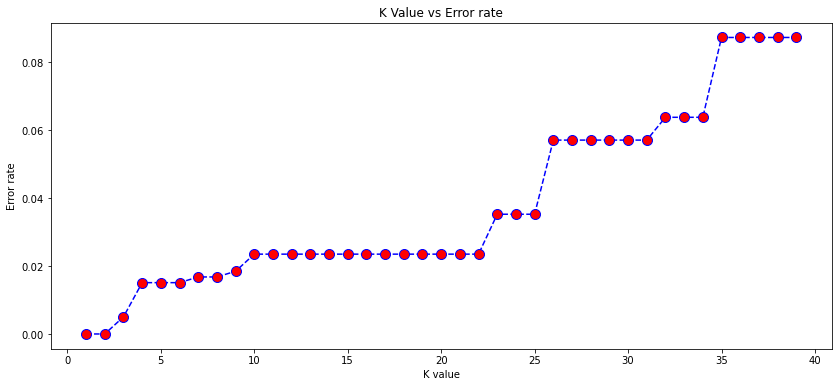

In [305]:
plt.figure(figsize=(14,6))
plt.plot(range(1,40),error_rate,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('K Value vs Error rate')

In [306]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [307]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00       308
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        44
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        28
          10       0.60      0.50      0.55         6
          11       0.58      0.78      0.67         9
          12       0.00      0.00      0.00         2
          13       1.00      0.50      0.67         4

    accuracy                           0.98       596
   macro avg       0.86      0.83      0.84       596
weighted avg       0.99      0.98      0.98       596



In [308]:
metrics.accuracy_score(ytest,ypred)*100

98.48993288590604

In [314]:
t1 = {
    'England ':1,
    'India ':2,
    'New Zealand ':3,
    'Pakistan ':4,
    'West Indies ':5,    
    'Sri Lanka ':6,
    'Australia ':7,
    'No Result':8,
    'South Africa ':9,
    'Match Tied':10,
    'Zimbabwe ':11,
    'Kenya ':12,
    'Bangladesh ':13
}

In [319]:
print(knn.predict([[2,7]])[0]) #Predicts India Will win against Australia

2


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

